In [4]:
# imoprt modules
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix , accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
import folium as fm

In [5]:
data = pd.read_csv(r"covid_19_clean_complete_2022.csv")

In [6]:
print(data.shape)
print(data.columns.values)
print(data.isnull().sum())

(214894, 10)
['Province/State' 'Country/Region' 'Lat' 'Long' 'Date' 'Confirmed'
 'Deaths' 'Recovered' 'Active' 'WHO Region']
Province/State    149189
Country/Region         0
Lat                 1546
Long                1546
Date                   0
Confirmed              0
Deaths                 0
Recovered              0
Active                 0
WHO Region          2319
dtype: int64


In [7]:
data = data.dropna()
print(data.isnull().sum())
print(data.dtypes)

Province/State    0
Country/Region    0
Lat               0
Long              0
Date              0
Confirmed         0
Deaths            0
Recovered         0
Active            0
WHO Region        0
dtype: int64
Province/State     object
Country/Region     object
Lat               float64
Long              float64
Date               object
Confirmed           int64
Deaths              int64
Recovered           int64
Active              int64
WHO Region         object
dtype: object


In [8]:
op = ["Province/State","Country/Region","WHO Region"]

for x in op:
    La = LabelEncoder()
    data[x] = La.fit_transform(data[x])

In [9]:
print(data.dtypes)

Province/State      int32
Country/Region      int32
Lat               float64
Long              float64
Date               object
Confirmed           int64
Deaths              int64
Recovered           int64
Active              int64
WHO Region          int32
dtype: object


In [10]:
print(data["Date"].head())
data["Date"] = pd.to_datetime(data["Date"])
data["day"] = data["Date"].dt.day
data["month"] = data["Date"].dt.month
data["year"] = data["Date"].dt.year
data = data.drop("Date", axis=1)
print(data.dtypes)

9     2020-01-22
10    2020-01-22
11    2020-01-22
12    2020-01-22
13    2020-01-22
Name: Date, dtype: object
Province/State      int32
Country/Region      int32
Lat               float64
Long              float64
Confirmed           int64
Deaths              int64
Recovered           int64
Active              int64
WHO Region          int32
day                 int64
month               int64
year                int64
dtype: object


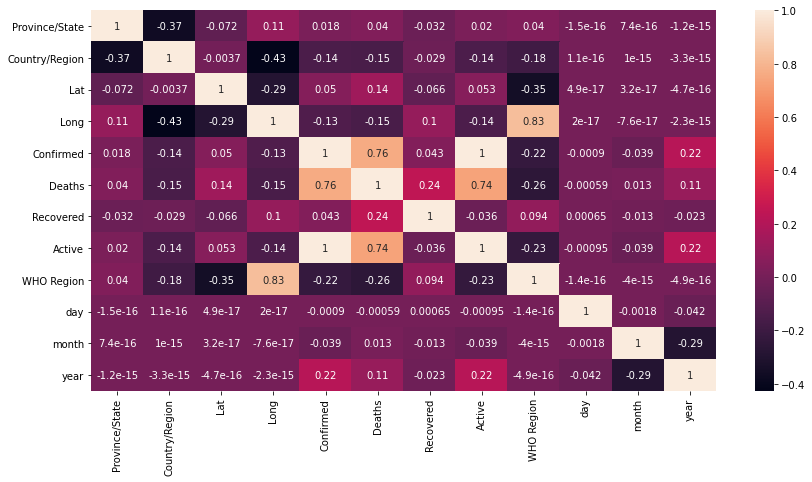

In [11]:
plt.figure(figsize=(14,7))
sns.heatmap(data.corr(), annot=True)
plt.show()

In [12]:
data["died"] = 0
data.loc[data["Deaths"] > 0, "died"] = 1
print(data["died"].value_counts())

1    47519
0    16640
Name: died, dtype: int64


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


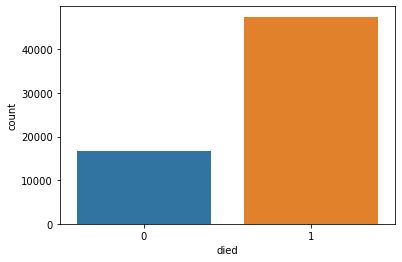

In [13]:
sns.countplot(data["died"])
plt.show()

In [14]:
x = data.drop("died", axis=1)
y = data["died"]

In [15]:
ss = StandardScaler()
x = ss.fit_transform(x)

In [16]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, shuffle =True)
print(X_train.shape)

(44911, 12)


In [17]:
Lo = LogisticRegression()
Lo.fit(X_train, y_train)

print("_"*100)
print(Lo.score(X_train, y_train))
print(Lo.score(X_test, y_test))
print("_"*100)

____________________________________________________________________________________________________
0.8232058961056311
0.8205008312551954
____________________________________________________________________________________________________


In [18]:
# print("_"*150)
# for x in range(2,20):
#     Dt = DecisionTreeClassifier(max_depth=x,random_state=33)
#     Dt.fit(X_train, y_train)

#     print("x = ", x)
#     print(Dt.score(X_train, y_train))
#     print(Dt.score(X_test, y_test))
#     print("_"*100)

In [19]:
Dt = DecisionTreeClassifier(max_depth=3,random_state=33)
Dt.fit(X_train, y_train)

print("_"*100)
print(Dt.score(X_train, y_train))
print(Dt.score(X_test, y_test))
print("_"*100)
y_pred = Dt.predict(X_test)


____________________________________________________________________________________________________
1.0
1.0
____________________________________________________________________________________________________


[[ 5049     0]
 [    0 14199]]


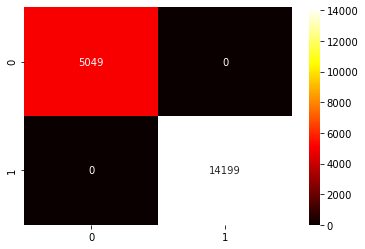

In [20]:
# confusion_matrix
Cm = confusion_matrix(y_test,y_pred)
print(Cm)
sns.heatmap(Cm,annot=True, fmt="d", cmap="hot")
plt.show()

In [21]:
# accuracy_score
print("_"*100)
As = accuracy_score(y_test,y_pred)
print(As)

____________________________________________________________________________________________________
1.0


In [23]:
# The autput result
result = pd.DataFrame({"y_test":y_test, "y_pred":y_pred})
# result.to_csv("The autput.csv",index=False)

In [30]:
df = data[:3000]
m = fm.Map(location=[20,0], tiles="OpenStreetMap", zoom_start=2)

for x,y in zip(df["Lat"],df["Long"]):
    fm.Marker([x,y]).add_to(m)
m